In [2]:
from tqdm import tqdm
import os
import json
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import seaborn as sns

In [3]:
def linear_CKA(X, Y):
    X_centered = X - X.mean(axis=0)
    Y_centered = Y - Y.mean(axis=0)
    hsic = np.linalg.norm(X_centered.T @ Y_centered, 'fro') ** 2
    var1 = np.linalg.norm(X_centered.T @ X_centered, 'fro')
    var2 = np.linalg.norm(Y_centered.T @ Y_centered, 'fro')

    return hsic / (var1 * var2)

# EncodecMAE vs Glove

In [4]:
encodec_vs_glove = []
with open(os.path.join('../../../experiments/layers/embeddings_layer0_glove.json'), 'r') as f:
    glove_list = json.load(f)
glove_matrix = np.array(glove_list)

for i in range(10):
    with open(os.path.join('../../..', 'experiments', 'layers', f'embeddings_layer{i}_encodecmae_base.json'), 'r') as f:
        model1_list = json.load(f)
    model1_matrix = np.array(model1_list)
    encodec_vs_glove.append(linear_CKA(model1_matrix, glove_matrix)) 

    del model1_list, model1_matrix
    gc.collect()
   
with open(f'cka_glove_encodecmae_base.json', 'w') as f:
    json.dump(encodec_vs_glove, f)

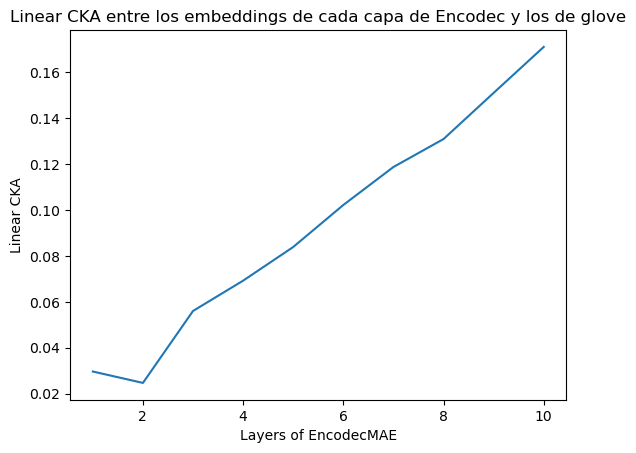

In [5]:
x = range(1,11)
plt.plot(x, encodec_vs_glove, label='encodec_vs_glove')

plt.xlabel('Layers of EncodecMAE')
plt.ylabel('Linear CKA')
plt.title('Linear CKA entre los embeddings de cada capa de Encodec y los de glove')
plt.show()

# BEATs vs Glove

In [7]:
beats_vs_glove = []
with open(os.path.join('../../../experiments/layers/embeddings_layer0_glove.json'), 'r') as f:
    glove_list = json.load(f)
glove_matrix = np.array(glove_list)

for i in range(12):
    with open(os.path.join('../../..', 'experiments', 'layers', f'embeddings_layer{i}_BEATs_iter3.json'), 'r') as f:
        model1_list = json.load(f)
    model1_matrix = np.array(model1_list)
    beats_vs_glove.append(linear_CKA(model1_matrix, glove_matrix)) 

    del model1_list, model1_matrix
    gc.collect()
   
with open(f'cka_glove_BEATs_iter3.json', 'w') as f:
    json.dump(beats_vs_glove, f)

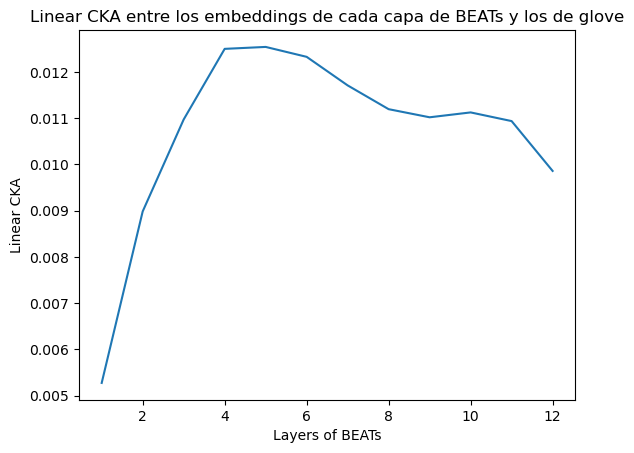

In [8]:
x = range(1,13)
plt.plot(x, beats_vs_glove, label='beats_vs_glove')

plt.xlabel('Layers of BEATs')
plt.ylabel('Linear CKA')
plt.title('Linear CKA entre los embeddings de cada capa de BEATs y los de glove')
plt.show()